# Financial Analysis


### Problem Statement:
- Without analyzing the competition, it is difficult for a business to survive. You are tasked to analyse the competition for the management to provide better results. This data set has information on the market capitalization of the top 500 companies in India.

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
import warnings

# Set the warning filter to 'ignore'
warnings.filterwarnings('ignore')

In [3]:
# Read the dataset

df=pd.read_csv(r"E:\Projects\Unified_Projects\Financial_Analytics\Financial Analytics data.csv")
df

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
0,1,Reliance Inds.,583436.72,99810.00,NaN
1,2,TCS,563709.84,30904.00,NaN
2,3,HDFC Bank,482953.59,20581.27,NaN
3,4,ITC,320985.27,9772.02,NaN
4,5,H D F C,289497.37,16840.51,NaN
...,...,...,...,...,...
483,496,Lak. Vilas Bank,3029.57,790.17,NaN
484,497,NOCIL,3026.26,249.27,NaN
485,498,Orient Cement,3024.32,511.53,NaN
486,499,Natl.Fertilizer,3017.07,2840.75,NaN


!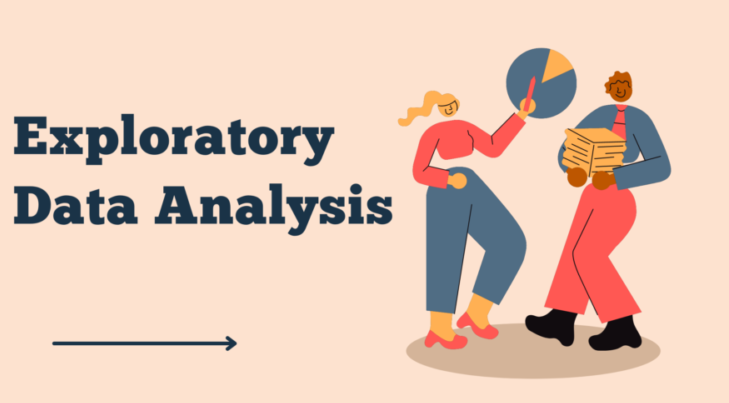

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              488 non-null    int64  
 1   Name               488 non-null    object 
 2   Mar Cap - Crore    479 non-null    float64
 3   Sales Qtr - Crore  365 non-null    float64
 4   Unnamed: 4         94 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 19.2+ KB


In [5]:
df.shape

(488, 5)

In [6]:
df.describe()

,S.No.,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
count,488.000000,479.000000,365.000000,94.000000
mean,251.508197,28043.857119,4395.976849,1523.870106
std,145.884078,59464.615831,11092.206185,1800.008836
min,1.000000,3017.070000,47.240000,0.000000
25%,122.750000,4843.575000,593.740000,407.167500
50%,252.500000,9885.050000,1278.300000,702.325000
75%,378.250000,23549.900000,2840.750000,2234.815000
max,500.000000,583436.720000,110666.930000,7757.060000


In [7]:
df.isnull().sum()

S.No.                  0
Name                   0
Mar Cap - Crore        9
Sales Qtr - Crore    123
Unnamed: 4           394
dtype: int64

#### Remove column unnamed because it contains more tha 50% of null values.

In [8]:
df = df.drop('Unnamed: 4', axis=1)

In [9]:
df.head()

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore
0,1,Reliance Inds.,583436.72,99810.00
1,2,TCS,563709.84,30904.00
2,3,HDFC Bank,482953.59,20581.27
3,4,ITC,320985.27,9772.02
4,5,H D F C,289497.37,16840.51


#### Fill null values with the mean of each column

In [10]:
df = df.fillna(df.mean())

In [11]:
df.isnull().sum()

S.No.                0
Name                 0
Mar Cap - Crore      0
Sales Qtr - Crore    0
dtype: int64

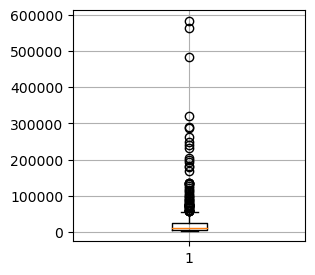

In [12]:
plt.figure(figsize=(3,3))
plt.boxplot(df["Mar Cap - Crore"])
plt.grid(True)
plt.show()

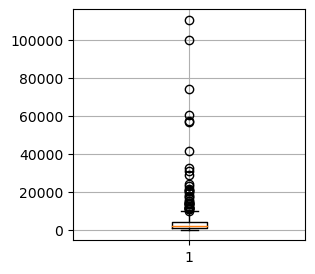

In [13]:
plt.figure(figsize=(3,3))
plt.boxplot(df["Sales Qtr - Crore"])
plt.grid(True)
plt.show()

### 1. Distribution of Market Capitalization (Mar Cap)

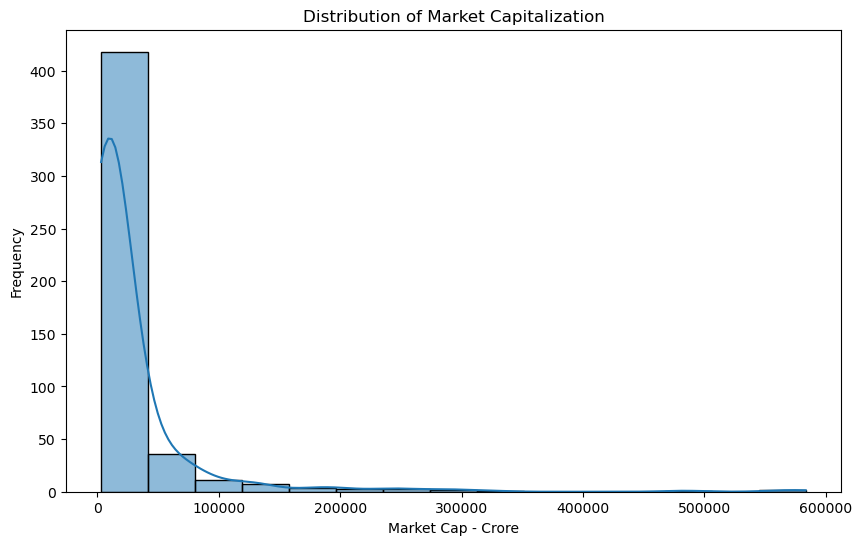

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Mar Cap - Crore'], bins=15, kde=True)
plt.title('Distribution of Market Capitalization')
plt.xlabel('Market Cap - Crore')
plt.ylabel('Frequency')
plt.show()

### 2.  Distribution of Sales Quarter

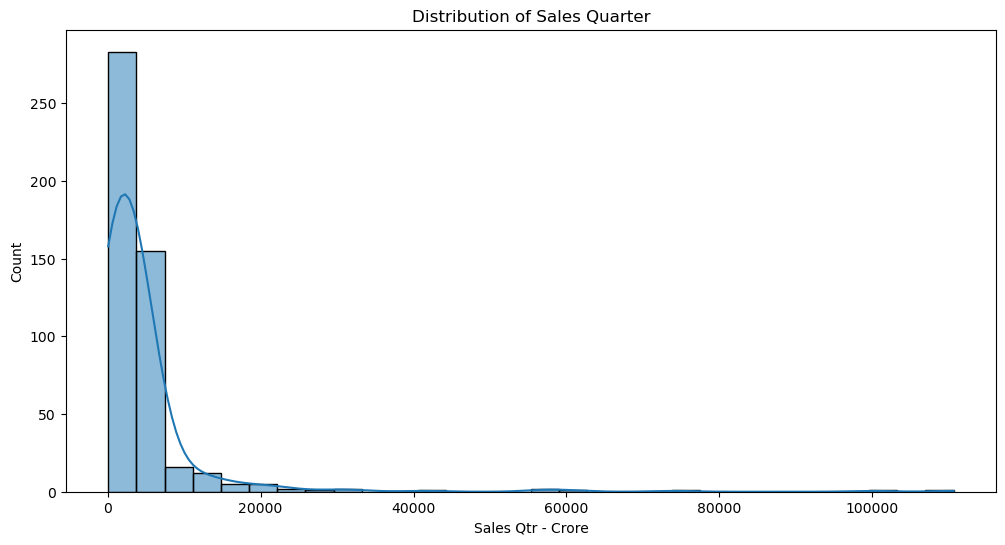

In [15]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Sales Qtr - Crore', bins=30, kde=True)
plt.title('Distribution of Sales Quarter')
plt.show()

### 3. Pairplot to visualize relationships between all numerical columns

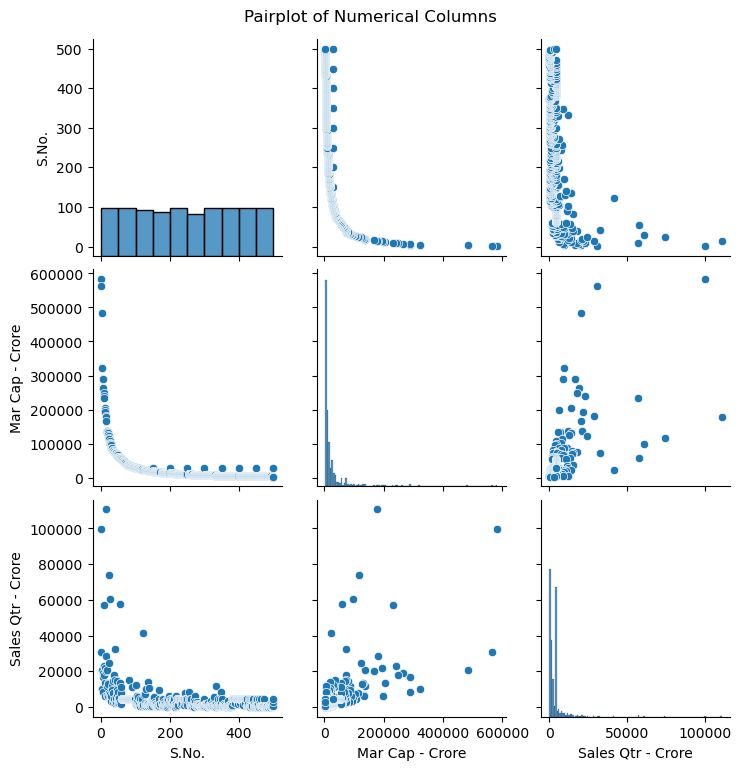

In [16]:
sns.pairplot(df)
plt.suptitle('Pairplot of Numerical Columns', y=1.02)
plt.show()

### 4. Scatter Plot: Mar Cap vs. Sales Qtr

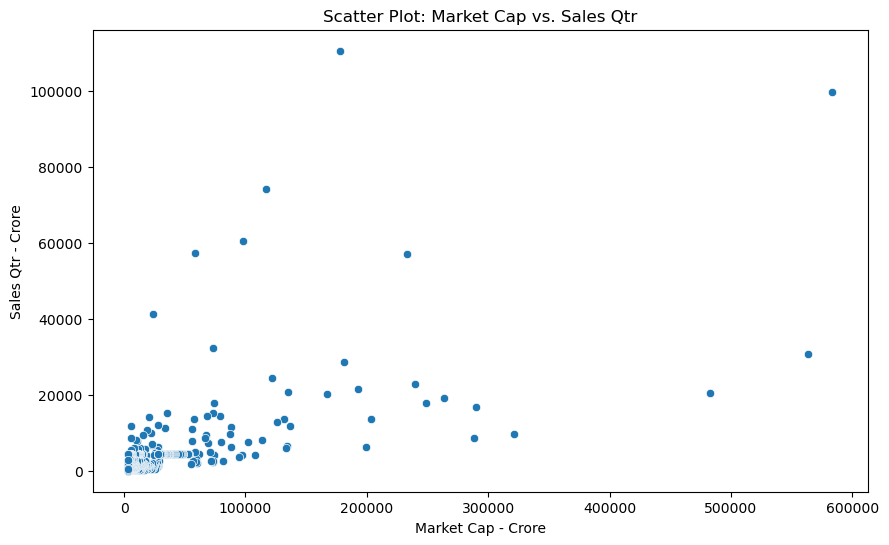

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Mar Cap - Crore', y='Sales Qtr - Crore', data=df)
plt.title('Scatter Plot: Market Cap vs. Sales Qtr')
plt.xlabel('Market Cap - Crore')
plt.ylabel('Sales Qtr - Crore')
plt.show()

### 5. Identify companies with the highest Market Capitalization.

In [18]:
top_companies = df.nlargest(5, 'Mar Cap - Crore')
top_companies

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore
0,1,Reliance Inds.,583436.72,99810.00
1,2,TCS,563709.84,30904.00
2,3,HDFC Bank,482953.59,20581.27
3,4,ITC,320985.27,9772.02
4,5,H D F C,289497.37,16840.51


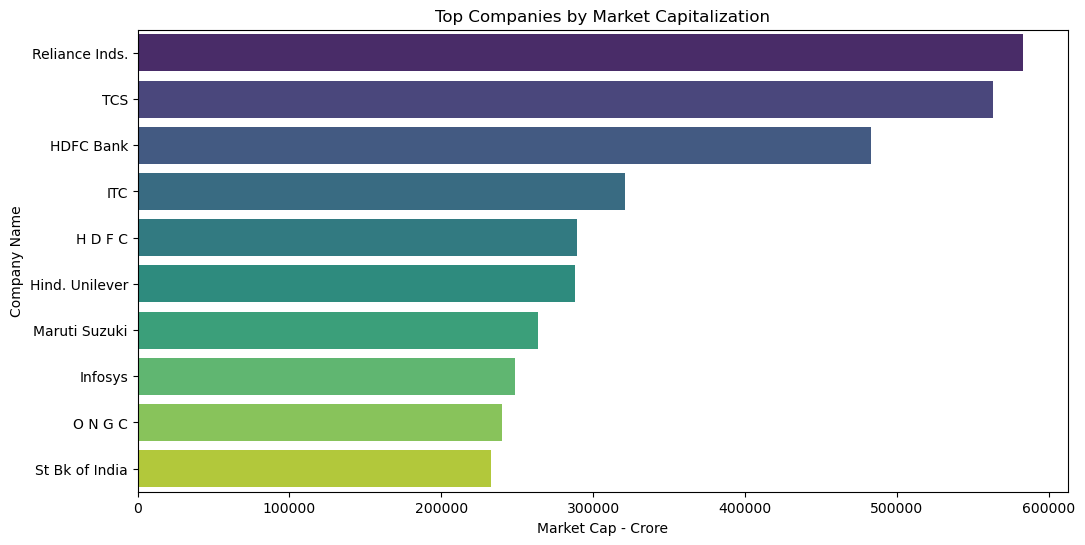

In [19]:
top_companies = df.nlargest(10, 'Mar Cap - Crore')  # Displaying top 10 companies
plt.figure(figsize=(12, 6))
sns.barplot(x='Mar Cap - Crore', y='Name', data=top_companies, palette='viridis')
plt.title('Top Companies by Market Capitalization')
plt.xlabel('Market Cap - Crore')
plt.ylabel('Company Name')
plt.show()


### 6.  Identifying companies with highest sales quarter .

In [20]:
top_companies = df.nlargest(5, 'Sales Qtr - Crore')
top_companies

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore
14,15,I O C L,178017.48,110666.93
0,1,Reliance Inds.,583436.72,99810.00
23,24,Tata Motors,117071.87,74156.07
27,28,B P C L,98278.00,60616.36
54,55,H P C L,58034.78,57474.25


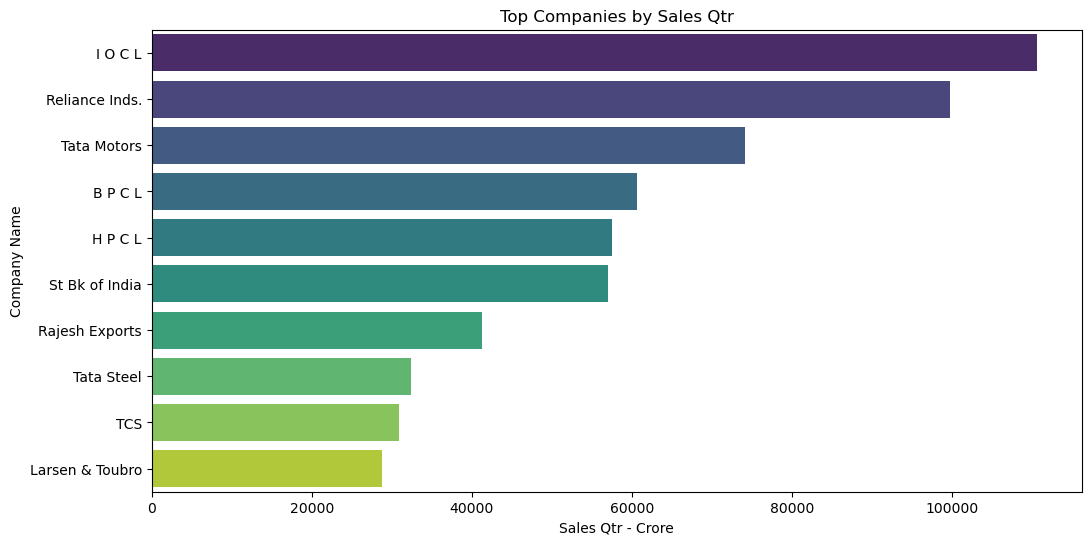

In [21]:
top_companies = df.nlargest(10, 'Sales Qtr - Crore')  # Displaying top 10 companies
plt.figure(figsize=(12, 6))
sns.barplot(x='Sales Qtr - Crore', y='Name', data=top_companies, palette='viridis')
plt.title('Top Companies by Sales Qtr')
plt.xlabel('Sales Qtr - Crore')
plt.ylabel('Company Name')
plt.show()

### 7. Correlation Heatmap

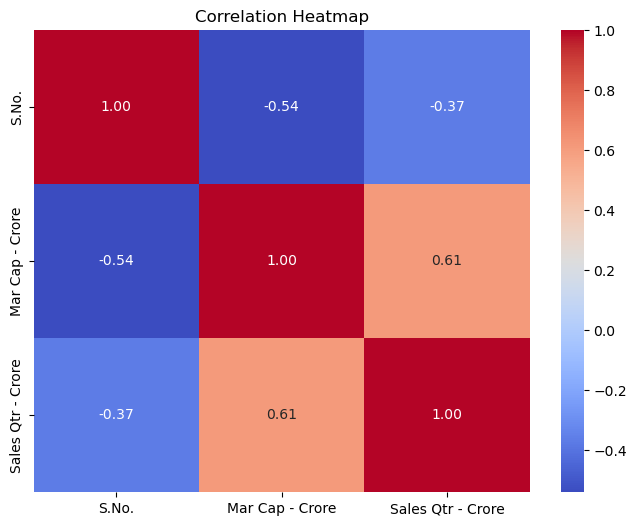

In [22]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


### 8. Analyze the distribution of Market Capitalization for potential outliers.

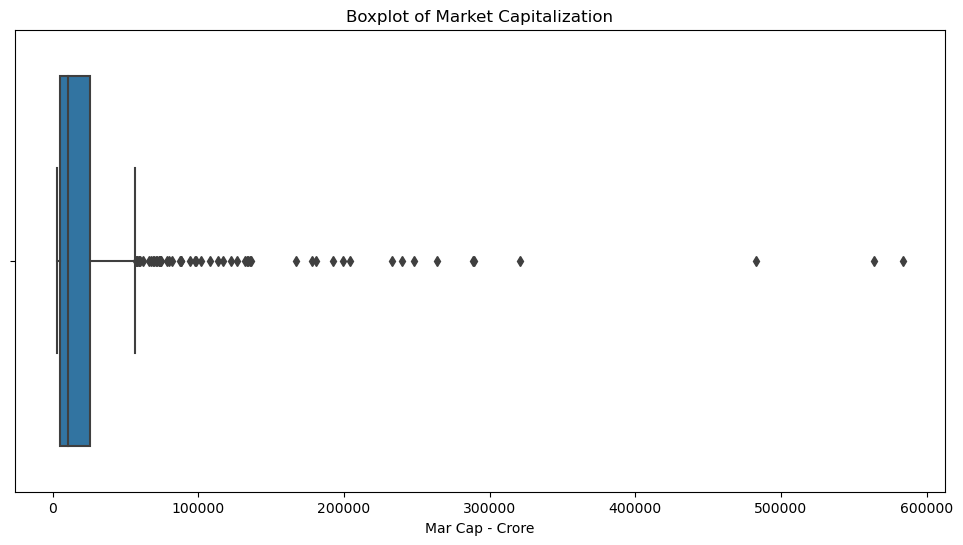

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Mar Cap - Crore')
plt.title('Boxplot of Market Capitalization')
plt.show()

### 9. Provide insights on companies with high market capitalization but lower sales.

In [24]:
low_sales_high_marcap = df[(df['Mar Cap - Crore'] > df['Mar Cap - Crore'].median()) & (df['Sales Qtr - Crore'] < df['Sales Qtr - Crore'].median())]
print('Companies with High Market Cap and Low Sales:')
print(low_sales_high_marcap[['Name', 'Mar Cap - Crore', 'Sales Qtr - Crore']])

Companies with High Market Cap and Low Sales:
                 Name  Mar Cap - Crore  Sales Qtr - Crore
50        Dabur India         60015.00            1966.44
59   Zee Entertainmen         54817.89            1838.07
102          NHPC Ltd         28059.24            1497.93
104  United Breweries         27797.69            1197.10
107  GlaxoSmith C H L         27340.89            1034.67
..                ...              ...                ...
217  Prestige Estates         11353.13            1272.30
225               SRF         10842.62            1397.06
226      GE T&D India         10778.42            1438.55
229        GMR Infra.         10653.44            2072.29
235           Escorts         10450.56            1205.03

[80 rows x 3 columns]


!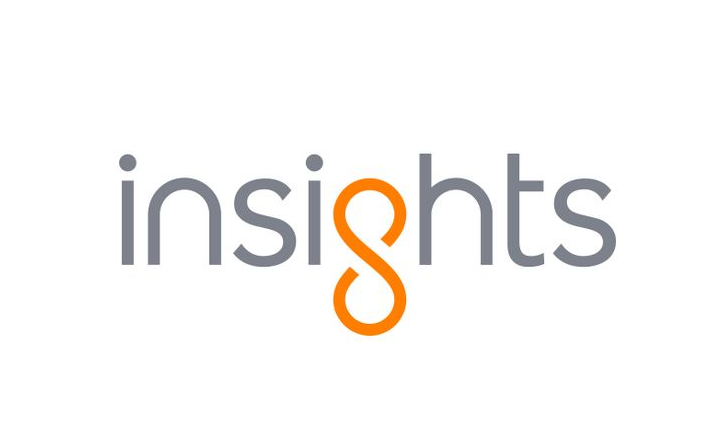

- Top Companies by market capitalization is Reliance industries .
- Top Companies by sales qtr is IOCL .
- In terms of  market cap ( 0-100000cr ) = 400+ companies .
- In terms of sales quarter ( 0-10000cr ) = 250+ companies .
- There is  a linear relationship between market cap & sales Qtr.